<a href="https://colab.research.google.com/github/kimsihyun0129/ArtificialIntelligence/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

## 데이터 변환

### 범주화

73.5


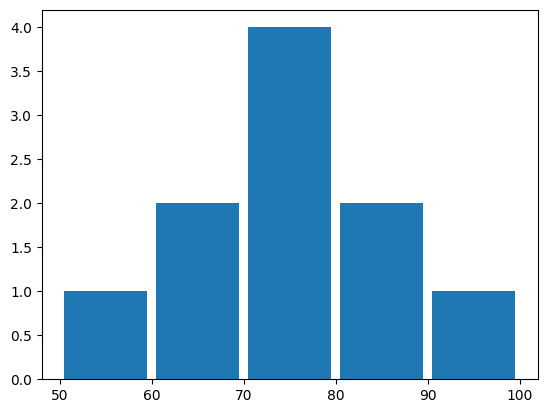

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 수학점수 (Math_score)
data = [["철수",52],["영희",92],["미영",84],["시완",71],["미경",65],["영환",81],["숙경",66],["부영",77],["민섭",73],["보연",74]]
df = pd.DataFrame(data, columns = ["이름","수학점수"])

print(np.mean(df["수학점수"]))

# 히스토그램, 범위 50~100, 5개 구간
plt.hist(df["수학점수"], bins = 5, range=[50,100], rwidth=0.9)
# rwidth로 그래프 폭을 조절할 수 있음(생략 시 기본값 1)
plt.show()
df

In [5]:
# 조건을 사용해서 구간을 직접 지정
df["등급"] = 0
df.loc[df["수학점수"]<60, "등급"] = "F"
df.loc[(df["수학점수"]>=60) & (df["수학점수"]<70), "등급"] = "D"
df.loc[(df["수학점수"]>=70) & (df["수학점수"]<80), "등급"] = "C"
df.loc[(df["수학점수"]>=80) & (df["수학점수"]<90), "등급"] = "B"
df.loc[(df["수학점수"]>=90) & (df["수학점수"]<100), "등급"] = "A"
df

<ipython-input-5-1f914d0e3633>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["수학점수"]<60, "등급"] = "F"


,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [6]:
# cut() 함수 사용
df["등급_cut"] = pd.cut(df["수학점수"], bins=5, labels=["F","D","C","B","A"], include_lowest=True)
df

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


In [11]:
# qcut() 함수 사용
df["등급_qcut"] = pd.qcut(df["수학점수"], q=5, labels=["F","D","C","B","A"])
df

,이름,수학점수,등급,등급_cut,등급_qcut
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,B,B
8,민섭,73,C,C,C
9,보연,74,C,C,C


### 표준 정규화

In [20]:
# 정규분포를 따르는 데이터를 생성하고, 데이터 프레임으로 변환

# 한국인, 일본인 각 성인 1000명 육류 소비량 데이터 생성
meat_consumption_korea = 5*np.random.randn(1000)+53.9
meat_consumption_japan = 4*np.random.randn(1000)+32.7

# 데이터 프레임 생성
meat_consumption = pd.DataFrame({"Korea":meat_consumption_korea, "Japan":meat_consumption_japan})

# 상위 6개 데이터 확인
meat_consumption.head(6)

,Korea,Japan
0,59.677273,38.615909
1,47.051208,28.018451
2,56.162631,35.485612
3,52.360042,36.242172
4,54.942889,32.112021
5,57.544464,34.337309


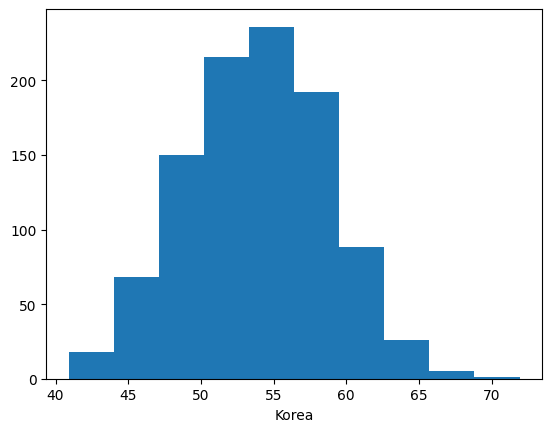

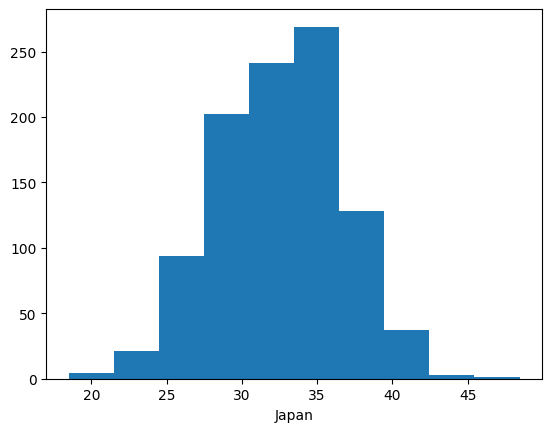

In [21]:
# 히스토그램을 통해 한국인과 일본인의 육류 소비량 분포를 확인

# 한국인 육류 소비량 히스토그램
plt.hist(meat_consumption_korea)
plt.xlabel("Korea")
plt.show()

# 일본인 육류 소비량 히스토그램
plt.hist(meat_consumption_japan)
plt.xlabel("Japan")
plt.show()

### z-표준화

In [23]:
# 표준정규화 수식을 직접 입력 : (x-np.mean(x)/np.std(x))
# 기존 데이터프레임에 새로운 z-표준화된 컬럼 추가
meat_consumption["Korea_z"] = (meat_consumption_korea-np.mean(meat_consumption_korea))/np.std(meat_consumption_korea)
meat_consumption["Japan_z"] = (meat_consumption_japan-np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head(6)

,Korea,Japan,Korea_z,Japan_z
0,59.677273,38.615909,1.208469,1.487840
1,47.051208,28.018451,-1.420224,-1.089034
2,56.162631,35.485612,0.476736,0.726678
3,52.360042,36.242172,-0.314947,0.910643
4,54.942889,32.112021,0.222791,-0.093643
5,57.544464,34.337309,0.764428,0.447457


In [24]:
# 표준정규화함수에 의한 변환 scipy 패키지 zscore() 함수 이용
# 기존 데이터프레임에 새로운 z-표준화된 컬럼 추가
import scipy.stats as stats

meat_consumption["korea_s2"] = stats.zscore(meat_consumption_korea)
meat_consumption["japan_s2"] = stats.zscore(meat_consumption_japan)

meat_consumption.head(6)

,Korea,Japan,Korea_z,Japan_z,korea_s2,japan_s2
0,59.677273,38.615909,1.208469,1.487840,1.208469,1.487840
1,47.051208,28.018451,-1.420224,-1.089034,-1.420224,-1.089034
2,56.162631,35.485612,0.476736,0.726678,0.476736,0.726678
3,52.360042,36.242172,-0.314947,0.910643,-0.314947,0.910643
4,54.942889,32.112021,0.222791,-0.093643,0.222791,-0.093643
5,57.544464,34.337309,0.764428,0.447457,0.764428,0.447457


In [26]:
# sckit-learn preprocessing
# 사이킷런 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["korea_sk"] = scaler.fit_transform(meat_consumption[["Korea"]])
meat_consumption["japan_sk"] = scaler.fit_transform(meat_consumption[["Japan"]])

meat_consumption.head()

,Korea,Japan,Korea_z,Japan_z,korea_s2,japan_s2,korea_sk,japan_sk
0,59.677273,38.615909,1.208469,1.487840,1.208469,1.487840,1.208469,1.487840
1,47.051208,28.018451,-1.420224,-1.089034,-1.420224,-1.089034,-1.420224,-1.089034
2,56.162631,35.485612,0.476736,0.726678,0.476736,0.726678,0.476736,0.726678
3,52.360042,36.242172,-0.314947,0.910643,-0.314947,0.910643,-0.314947,0.910643
4,54.942889,32.112021,0.222791,-0.093643,0.222791,-0.093643,0.222791,-0.093643


### Min-Max 정규화

In [27]:
# Min-Max 변환 수식 이용 : (x-np.min(x)/(np.max(x)-np.min(x))

Min = np.min(meat_consumption_korea)
Max = np.max(meat_consumption_korea)
meat_consumption["Korea_mm"] = (meat_consumption[["Korea"]]-Min)/(Max-Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption["Japan_mm"] = (meat_consumption[["Japan"]]-Min)/(Max-Min)

meat_consumption.head()

,Korea,Japan,Korea_z,Japan_z,korea_s2,japan_s2,korea_sk,japan_sk,Korea_mm,Japan_mm
0,59.677273,38.615909,1.208469,1.487840,1.208469,1.487840,1.208469,1.487840,0.605272,0.671697
1,47.051208,28.018451,-1.420224,-1.089034,-1.420224,-1.089034,-1.420224,-1.089034,0.198231,0.317879
2,56.162631,35.485612,0.476736,0.726678,0.476736,0.726678,0.476736,0.726678,0.491966,0.567186
3,52.360042,36.242172,-0.314947,0.910643,-0.314947,0.910643,-0.314947,0.910643,0.369378,0.592445
4,54.942889,32.112021,0.222791,-0.093643,0.222791,-0.093643,0.222791,-0.093643,0.452644,0.454551


In [28]:
# Min-Max sckit-learn MinMaxScaler() 함수 이용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption["korea_mmsk"] = scaler.fit_transform(meat_consumption[["Korea"]])
meat_consumption["japan_mmsk"] = scaler.fit_transform(meat_consumption[["Japan"]])

meat_consumption.head()

,Korea,Japan,Korea_z,Japan_z,korea_s2,japan_s2,korea_sk,japan_sk,Korea_mm,Japan_mm,korea_mmsk,japan_mmsk
0,59.677273,38.615909,1.208469,1.487840,1.208469,1.487840,1.208469,1.487840,0.605272,0.671697,0.605272,0.671697
1,47.051208,28.018451,-1.420224,-1.089034,-1.420224,-1.089034,-1.420224,-1.089034,0.198231,0.317879,0.198231,0.317879
2,56.162631,35.485612,0.476736,0.726678,0.476736,0.726678,0.476736,0.726678,0.491966,0.567186,0.491966,0.567186
3,52.360042,36.242172,-0.314947,0.910643,-0.314947,0.910643,-0.314947,0.910643,0.369378,0.592445,0.369378,0.592445
4,54.942889,32.112021,0.222791,-0.093643,0.222791,-0.093643,0.222791,-0.093643,0.452644,0.454551,0.452644,0.454551


## PCA(주성분 분석)

### 데이터 준비하기

In [29]:
# 깃허브에 있는 iris 데이터 (여러 붓꽃의 꽃잎과 꽃받침의 너비와 길이에 대한 관측치를 모은 자료)를 사용

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
# 연속형 변수와 범주형 변수 분리
df = iris.drop(["species"], axis=1)
df_species = iris["species"]

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### PCA 분석 수행

In [34]:
# 변수 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["sepal_length"] = scaler.fit_transform(df[["sepal_length"]])
df["sepal_width"] = scaler.fit_transform(df[["sepal_width"]])
df["petal_length"] = scaler.fit_transform(df[["petal_length"]])
df["petal_width"] = scaler.fit_transform(df[["petal_width"]])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 변환할 차원의 수를 의미
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_) # 변환된 각각의 차원의 기여도

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]
